# Import common Module

In [2]:
%config IPCompleter.greedy=True

In [5]:
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)

In [6]:
import sklearn
sklearn.__version__

'0.22.1'

In [2]:
import numpy as np
import os
np.random.seed(42)

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear regression using Normal Equation

In [9]:
#test the Normal Equation
# y= 4 + 3X1 + noice

import numpy as np

random1 = np.random.rand(100, 1)
random2 = np.random.rand(100, 1)

#print(random1)
#print (random2)

X = 2 * random1
y = 4 + 3 * X + random2

#print(y)

[0, 2, 0, 15]

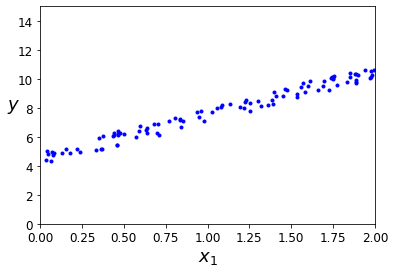

In [16]:
# plot the data

plt.plot(X,y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

In [48]:
# Compute theta-hat using Normal Equation

X_b = np.c_[np.ones((100,1)), X]
#print(X_b.T.dot(X_b))
#print(np.linalg.inv(X_b.T.dot(X_b)))
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.57308726]
 [2.98208102]]


In [31]:
# Now let's make the predictions

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.57308726],
       [10.5372493 ]])

In [49]:
#X_new

[0, 2, 0, 15]

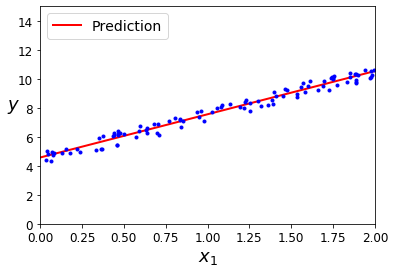

In [40]:
# plot the data

plt.plot(X_new, y_predict, "r", linewidth=2, label="Prediction")
plt.plot(X,y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])

# Linear regression using SKLearn

In [45]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
linReg.intercept_, linReg.coef_

(array([4.57308726]), array([[2.98208102]]))

In [51]:
#Predict

linReg.predict(X_new)

array([[ 4.57308726],
       [10.5372493 ]])

# Linear Regression using Gradient Descent

In [55]:
eta = 0.1  # Learning rate
n_interations = 1000
m=100

theta = np.random.randn(2,1)   # random Init
theta


array([[-1.4480139 ],
       [-2.19880596]])

In [63]:
# Calculate the Gradient Vector

for i in range(n_interations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y )
    theta = theta - eta * gradients

print(gradients)
print(theta)

[[-4.44089210e-15]
 [ 2.16495399e-15]]
[[4.57308726]
 [2.98208102]]


In [64]:
X_new_b.dot(theta)

array([[ 4.57308726],
       [10.5372493 ]])

In [65]:
# Creating a function to plot the Gradient Decent

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

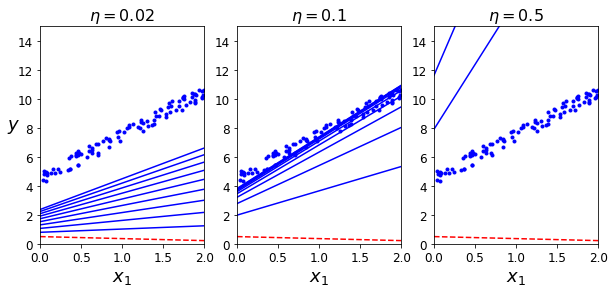

In [76]:
# Plotting the Gradient Descent

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
plt.figure(figsize=(10,4))

plt.subplot(131); plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

# Stochastic Gradient Descent

In [84]:
theta_path_sgd = []
m = len(X_b)

np.random.seed(42)
m

100

[0, 2, 0, 15]

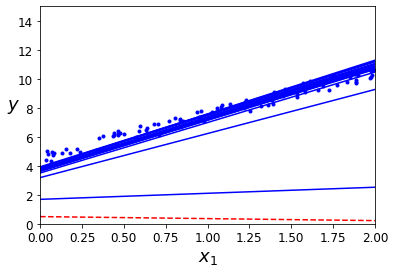

In [85]:
# Create SGD using simple learning schedule

n_epochs = 50
t0, t1 = 5, 50   # learning schedule hyper-parameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)       # random init

for epoch in range(n_epochs):
    for i in range(m):
        if epoch ==0 and i <20:
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)  
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)    
  
# Plotting the Stochastic Gradient Descent we created above

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])   

In [86]:
theta

array([[4.56212555],
       [2.98631355]])

# SGD using SKLearn

In [88]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

sgd.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [89]:
sgd.intercept_, sgd.coef_

(array([4.56558945]), array([2.98272792]))